# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
df = pd.read_excel('geo_comment.xlsx')
df.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [2]:
from matplotlib import pyplot as plt
plt.scatter(df.x, df.y, [0.2 for s in range(len(df))], df.comment_class, cmap='flag')
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
import numpy as np

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = np.c_[np.array(df.x),np.array(df.y)]
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(0.1).fit_predict(X_scaled)

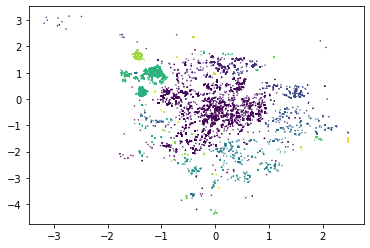

In [5]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], [0.2 for s in range(len(df))], clusters)

11830
clusters count 3
58552
clusters count 8


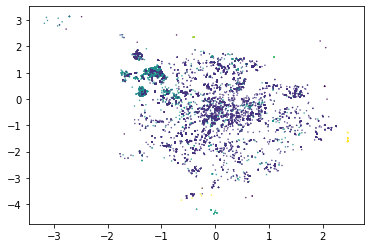

In [7]:
positive_X = X[df.comment_class == 1]
negative_X = X[df.comment_class == -1]

for _X in (positive_X, negative_X):
    _X_scaled = scaler.transform(_X)
    clusters = DBSCAN(0.3).fit_predict(_X_scaled)
    plt.scatter(_X_scaled[:,0], _X_scaled[:,1], [0.2 for s in range(len(_X_scaled))], clusters)
    print(len(_X_scaled))
    print(f"clusters count {len(pd.DataFrame(clusters)[0].unique())}")
plt.show()